# Reducing dimension of text data: an example of applying PCA and t-SNE to word embeddings 

In this notebook I am applying dimensionality reduction techniques to preprocessed lyrics of the songs.
Dataset is a set of lyrics of 48 various songs, from poetry to Justin Bieber. <br>

I've wanted to see how much varianced can be collected by reducing the dimensions of word vectors from 300 to 2. <br>
Actually I will call these vectors "song vectors" because each of these vectors is an averaged embedding of all words existing in the song.

## Songs preprocessing

**Text preprocessing** is the process of cleaning and preparing text data for further analysis or natural language processing tasks. It is an important step in any NLP project because raw text is often messy and unstructured, and needs to be cleaned and standardized before it can be used effectively.

The steps of text preprocessing typically include:

1. **Removing punctuation**, special characters, and numbers: This step helps to standardize the text and eliminate any irrelevant or noisy data that might interfere with the analysis.

2. **Tokenization**: This step involves splitting the text into individual words or tokens, which makes it easier to analyze the words and their relationships within the text.
3. **Removing stop words**: Stop words are common words that have little meaning or significance on their own, such as "a," "the," and "and." Removing these words helps to reduce the size of the data and focus on the more meaningful words in the text.
4. **Stemming or lemmatization**: This step involves reducing words to their root form, which helps to standardize the text and make it easier to analyze. For example, "swimming," "swam," and "swum" can all be reduced to the root word "swim."
5. **Encoding**: This step involves converting the cleaned and preprocessed text into a numerical representation that can be fed into a machine learning model or other natural language processing algorithm.
Overall, text preprocessing is crucial because it helps to clean, standardize, and prepare text data for further analysis, and is an essential step in any NLP project.

<img src="https://miro.medium.com/max/1400/1*pzjECYWP8WOWhwfCjebZVw.webp" alt="drawing" width="700" title="Visualization of text preprocessing" /> <br>
[Source](https://eng.ftech.ai/wp-content/uploads/2019/06/Screen-Shot-2019-06-14-at-11.28.23-1024x538.png)


In [1]:
# Import libraries
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk 
import string
import os
from itertools import combinations
import warnings
import itertools
from IPython.display import HTML
from ipywidgets import Video
from spacy.lang.en.stop_words import STOP_WORDS
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
nlp = spacy.load('en_core_web_md')
warnings.filterwarnings('ignore')

In [2]:
# Set parameters for plots
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

In [3]:
# Set directory
folder_path = "/Volumes/Macintosh HD – dane/GitHub/masters/first semester/Unsupervised Learning/article_2/data"
os.chdir(folder_path)

In [4]:
# Function which creates a list, each position of a final list is a list of song words
def get_lyrics(list_of_songs = []):
    
    for file in os.listdir(): # iterate through directory
        
        if file.endswith(".txt"): # open each file
            file_path = f"{folder_path}/{file}"

            lyrics = pd.read_csv(file_path, sep='\b', quoting=3, encoding='utf-8', header=None, names=['lines'])
            lyrics_list = lyrics['lines'].tolist() # transform song words into a list
            list_of_songs.append(lyrics_list)
            
    return list_of_songs

In [5]:
# Function which outputs a list of vectors created from the lyrics
def lyrics_preprocess(songs_list, stopwords, songs_vectors = [], stop_words_check = []):

    for song in tqdm(songs_list):

        text = " ".join(song) # create a list of words
        doc = nlp(text)

        tokens  = [token.text for token in doc] # tokenize
        tokens = [token.lemma_ for token in doc] # lemmantize

        tokens = [token for token in tokens if token not in string.punctuation] # remove punctuation
        tokens = [token.lower() for token in tokens] # lower words
        tokens = [item for item in tokens if item not in stopwords] # remove stopwords

        for word in tokens: # checking if any stop word somehow was not deleted
            
            if word in stopwords:
                stop_words_check.append(word)
            assert len(stop_words_check) == 0, 'Error: not all of the stopwords were deleted from text'
        
        tokens_concat = " ".join(tokens) # joining words into one string
        sentence_vec = nlp(tokens_concat) # vectorizing
        songs_vectors.append(sentence_vec.vector) #saving song vector
        
    return songs_vectors

In [6]:
# Function which creates column names from files names in the directory
def create_column_names(list_of_columns = []):

    for file in os.listdir():
        file = file[:-4]
        list_of_columns.append(file)

        if '.DS_S' in list_of_columns:
            list_of_columns.remove('.DS_S')

    return list_of_columns

In [ ]:
# Uploading stop words
stop = STOP_WORDS
stop.update(['...', '....', '1', '2', '3', '4', '5', 'chorus', ':]', '[:'])

In [ ]:
# Exctracting songs vectors
lyrics = get_lyrics()
lyrics_vectors = lyrics_preprocess(lyrics, stopwords = stop)
df_columns = create_column_names()

songs_df = pd.DataFrame(lyrics_vectors).T
songs_df.columns = df_columns
songs_df.head()

100%|██████████| 48/48 [06:40<00:00,  8.35s/it]


,prince,dickinson,beatles,bob-dylan,bjork,johnny-cash,disney,janisjoplin,kanye,bob-marley,...,r-kelly,drake,britney-spears,bruce-springsteen,nicki-minaj,kanye-west,paul-simon,nickelback,eminem,bruno-mars
0,0.488899,-0.151497,0.866229,0.332050,0.464633,-0.052686,0.628423,1.015842,0.393763,0.855792,...,0.799079,0.404629,1.180542,0.407606,0.457071,0.121589,0.254363,0.492601,0.342824,1.013985
1,1.610341,0.748771,1.241061,1.255925,1.078212,1.197751,1.076042,0.849392,1.128111,0.946536,...,1.237406,1.262244,1.398354,1.339310,1.205130,1.069831,0.998072,1.366088,1.295770,1.322053
2,-1.936098,-1.636477,-2.377264,-1.891242,-2.123817,-2.158009,-1.888964,-2.310341,-2.193906,-2.262774,...,-2.352120,-2.181932,-2.494427,-2.476290,-2.033452,-2.097285,-2.303176,-2.186932,-2.072237,-2.356970
3,-0.821185,-0.192223,-0.816632,-0.467427,-0.406551,-0.025675,-0.709705,-1.149756,-0.394666,-0.309796,...,-0.881137,-0.501777,-1.125783,-0.479958,-0.329150,-0.649858,-0.553310,-0.386956,-0.240733,-0.748238
4,-0.371704,0.994015,-0.149797,0.647207,0.377207,0.430123,0.280071,-0.508992,0.116053,-0.125651,...,-0.039799,-0.022557,-0.342595,0.280042,-0.274202,-0.136441,0.717278,0.202165,-0.023635,-0.443886


In [ ]:
# Saving dataframe
songs_df.to_csv('/Volumes/Macintosh HD – dane/GitHub/masters/first semester/Unsupervised Learning/article_2/songs_vectors.csv')

## Exploring similarities

In this step, I am creating a function, which outputs the **cosine similarity** of two songs. Next, I construct a similarity matrix. It shows us the magnitude of similarity between songs in the dataset. <br>
**Cosine similarity** is simply a cosine of an angle between two vectors. Equation is shown below.

<img src="https://miro.medium.com/max/1400/1*LfW66-WsYkFqWc4XYJbEJg.webp" alt="drawing" width="700" title="Visualization of text preprocessing" /> <br>
[Source](https://towardsdatascience.com/cosine-similarity-how-does-it-measure-the-similarity-maths-behind-and-usage-in-python-50ad30aad7db)

In [7]:
# Upload dataframe
songs_df = pd.read_csv("/Volumes/Macintosh HD – dane/GitHub/masters/first semester/Unsupervised Learning/article_2/songs_vectors.csv", index_col=0)
column_names = songs_df.columns

In [8]:
songs_df['prince']

0      0.488899
1      1.610341
2     -1.936098
3     -0.821185
4     -0.371704
         ...   
295   -0.493059
296    0.522071
297    1.234423
298   -2.219106
299    0.669788
Name: prince, Length: 300, dtype: float64

In [9]:
# Calculate cosine similarity between songs
cos_sim = []
for column in column_names:
    a = songs_df[column]
    for i in column_names:
        b = songs_df[i]
        similarity = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
        cos_sim.append(similarity) 

In [10]:
# Create similarity matrix
cos_sim_matrix = np.reshape(cos_sim, (48, 48))
cos_sim_df = pd.DataFrame(cos_sim_matrix, index = column_names, columns = column_names)

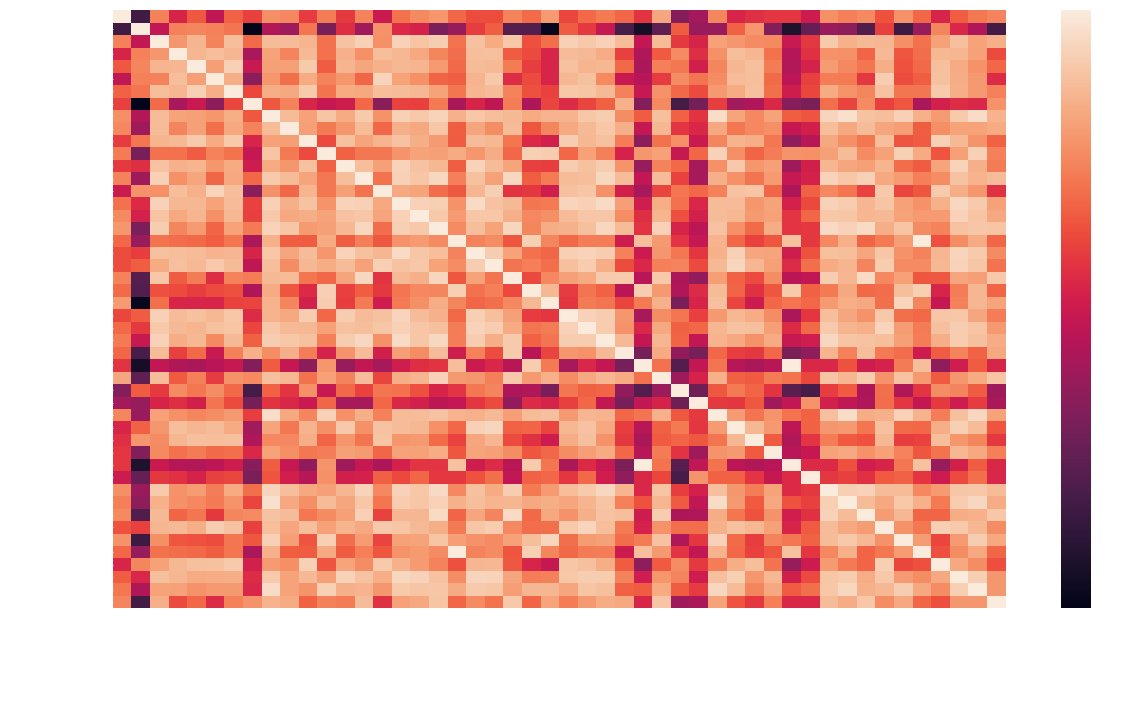

In [47]:
# Plot a heatmap
plt.rcParams["figure.figsize"] = (20,11)
fig = sns.heatmap(cos_sim_df)

## PCA

**Principal Component Analysis (PCA)** is a statistical technique that is used to reduce the dimensionality of data. It is a widely used method in data science and machine learning, and is particularly useful for visualizing and analyzing high-dimensional data.

**PCA** works by transforming the original data into a new set of orthogonal dimensions, known as principal components, which are ranked in order of importance based on the variance of the data they represent. <br>

The first principal component is the dimension that captures the most variation in the data, followed by the second principal component, and so on. <br>

Visualization of reducing the dimensions from 3D to 2D is shown below.

<img src="pca.png" alt="drawing" width="500" height="300" title="Visualization of text preprocessing" /> <br>
[Source](https://setosa.io/ev/principal-component-analysis/)

In [13]:
songs_df_transpose = songs_df.T

In [14]:
# Scaling data
sc = StandardScaler()
sc.fit(songs_df_transpose)
df_transformed = sc.transform(songs_df_transpose)
df_transformed.shape

(48, 300)

In [15]:
# Initialize PCA
pca = PCA()
df_pca = pca.fit_transform(df_transformed)

In [16]:
# Amount of explained variance
variance_pca = pca.explained_variance_ratio_

In [17]:
# Cumulative explained variance
cumulative_variance = np.cumsum(variance_pca)

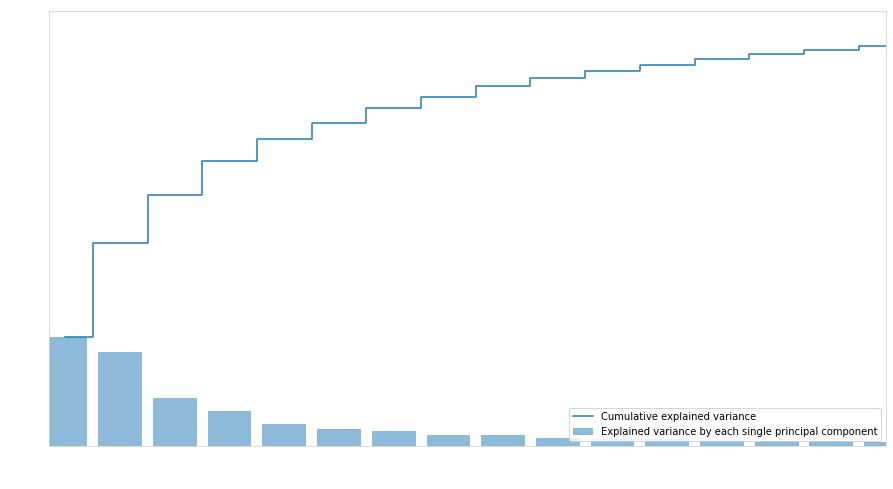

In [18]:
# Plot scree plot
plt.rcParams["figure.figsize"] = (15,8)
plt.bar(range(0, len(variance_pca)), 
        variance_pca, 
        alpha=0.5,
        align='center',
        label='Explained variance by each single principal component'
       
)
plt.step(range(0, len(variance_pca)),
        cumulative_variance,
        where='mid',
        label='Cumulative explained variance')
plt.xlabel('Principal component index', fontsize=15)
plt.ylabel('% of explained variance', fontsize=15)
plt.xlim(-0.3, 15)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

In [19]:
# Compute similarities with information about artists
similarities_with_artists = []
for column in column_names:
    a = songs_df[column]
    for i in column_names:
        b = songs_df[i]
        similarity = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
        similarities_with_artists.append([column, i, similarity]) 

In [20]:
similarities_with_artists[0:5]

[['prince', 'prince', 0.9999999999999999],
 ['prince', 'dickinson', 0.8289102770801587],
 ['prince', 'beatles', 0.9453479245589446],
 ['prince', 'bob-dylan', 0.9037410201356254],
 ['prince', 'bjork', 0.9276630644531176]]

In [21]:
# Prepare dataframe and delete observations from diagonal of similarity matrix
similarities_df = pd.DataFrame(similarities_with_artists, columns = ['artist1', 'artist2', 'cosine_similarity']).reset_index()
similarities_df['cosine_similarity'] = np.round(similarities_df['cosine_similarity'], 7)
similarities_df = similarities_df[(similarities_df['cosine_similarity'] != 1) | (similarities_df['artist1'] != similarities_df['artist2'])]

In [22]:
# Prepare top 10 similarities
top10 = similarities_df.sort_values(by='cosine_similarity', ascending=False).head(20).reset_index()
top10 = top10.iloc[::2, :]
top10['artist1_artist2'] = top10['artist1'] + ' and ' + top10['artist2']

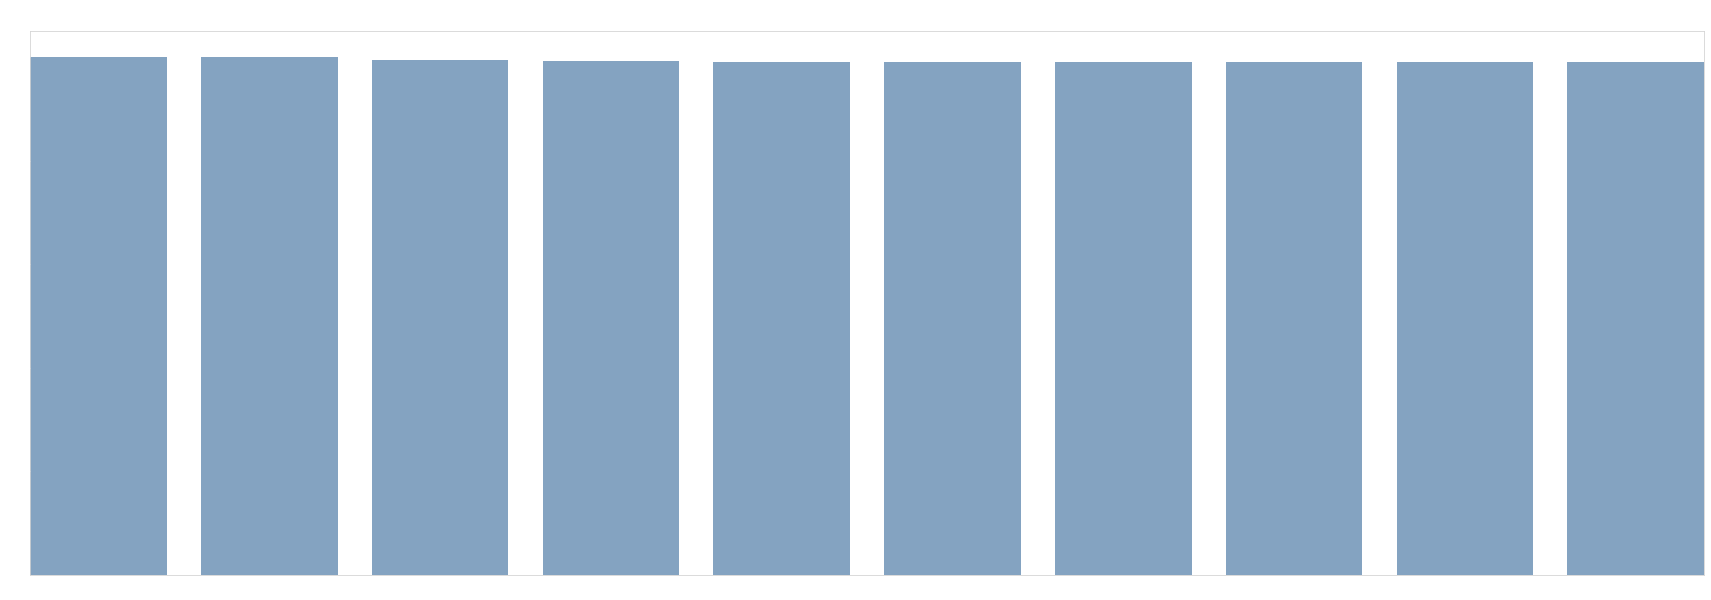

In [46]:
# Plot top 10 similarities
plt.rcParams["figure.figsize"] = (30,10)
fig = plt.bar(x='artist1_artist2', height='cosine_similarity', 
            data=top10,
            width = 0.8,
            color=(0.2, 0.4, 0.6, 0.6))
plt.title("Top 10 similarities", color='white', fontsize = 25)
plt.margins(x=0)

In [24]:
# Prepare bottom 10 similarities
bottom10 = similarities_df.sort_values(by='cosine_similarity', ascending=False).tail(20).reset_index()
bottom10 = bottom10.iloc[::2, :]
bottom10

,level_0,index,artist1,artist2,cosine_similarity
0,75,75,dickinson,al-green,0.834145
2,1477,1477,lin-manuel-miranda,dr-seuss,0.833334
4,366,366,janisjoplin,lin-manuel-miranda,0.831733
6,95,95,dickinson,bruno-mars,0.830757
8,1,1,prince,dickinson,0.828910
10,2017,2017,nicki-minaj,dickinson,0.827543
12,84,84,dickinson,Lil_Wayne,0.810339
14,1345,1345,lil-wayne,dickinson,0.805703
16,1105,1105,missy-elliott,dickinson,0.797377
18,337,337,janisjoplin,dickinson,0.794100


In [25]:
bottom10['artist1_artist2'] = bottom10['artist1'] + ' and ' + bottom10['artist2']

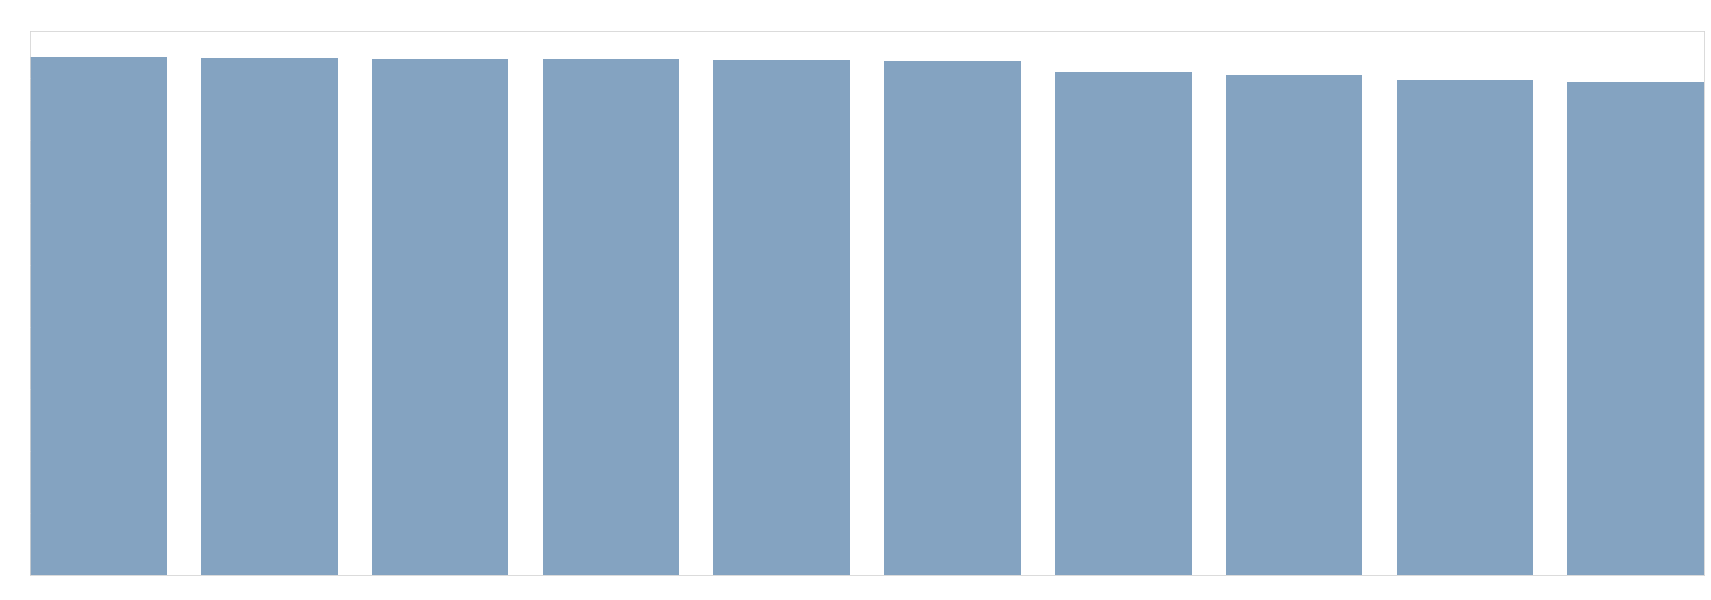

In [45]:
# Plot bottom 10 similarities
plt.rcParams["figure.figsize"] = (30,10)
fig = plt.bar(x='artist1_artist2', height='cosine_similarity', 
            data=bottom10,
            width=0.8,
            color=(0.2, 0.4, 0.6, 0.6))
plt.title("Bottom 10 similarities", color='white', fontsize = 25)
plt.margins(x=0)

In [27]:
# making PCA with 2 components
pca = PCA(n_components=2)
pca_2 = pca.fit_transform(df_transformed)
pca_df = pd.DataFrame(pca_2, columns = ['PC1', 'PC2'])

In [28]:
pca_df.head()

,PC1,PC2
0,1.198047,-9.893591
1,7.682520,20.862784
2,-8.635584,-0.994121
3,-0.949580,9.255321
4,2.632332,8.285964


In [29]:
print("Explained variance with 2 components: {}%".format(np.round(np.sum(pca.explained_variance_ratio_) * 100, 2)))

Explained variance with 2 components: 46.64%


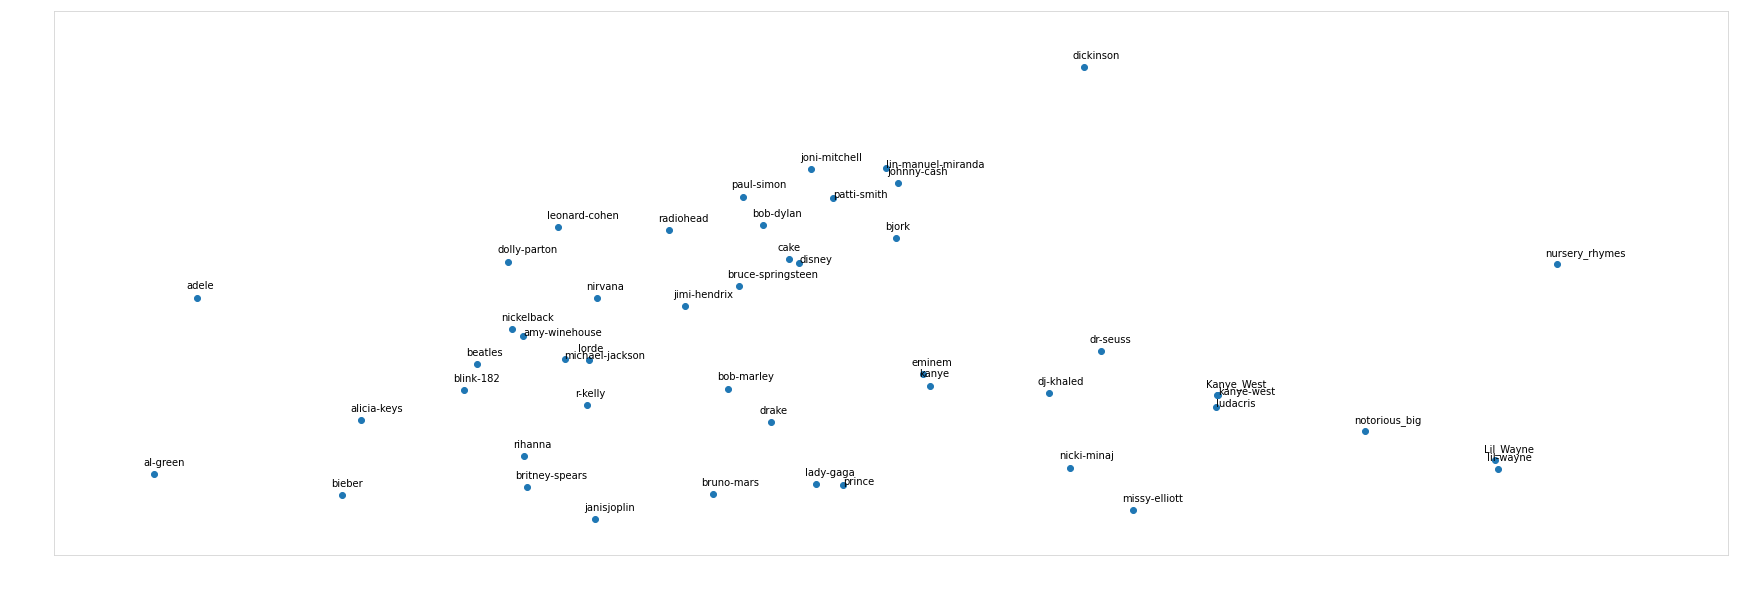

In [30]:
# Plot results
fix, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (15,8)
ax.scatter(pca_df['PC1'], 
            pca_df['PC2'])
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.xlim(-20, 25)
plt.ylim(-15, 25)

xax = pca_df['PC1']
yax = pca_df['PC2']
for i, txt in enumerate(column_names):

    not_to_move = ['ludacris', 'prince', 'patti-smith', 'michael-jackson', 'amy-winehouse', 'lin-manuel-miranda', 'disney', 'kanye-west']
    if txt not in not_to_move:
        ax.annotate(txt, (xax[i] - 0.3, yax[i] + 0.6))
        
    else:
         ax.annotate(txt, (xax[i], yax[i]))
    


## t-SNE

**t-SNE** algorithm, like PCA, is used to reduce the dimensionality of the data and enables its visualization.

**t-SNE** works by minimizing the difference between the pairwise similarities of the data points in the high-dimensional space and their positions in the low-dimensional space. 
<br>

It does this by first converting the pairwise distances between the data points in the high-dimensional space into probabilities using a Gaussian distribution. These probabilities are then used to calculate the similarity between the data points in the low-dimensional space. <br>

The algorithm then uses **gradient descent** to iteratively adjust the positions of the data points in the low-dimensional space in order to minimize the difference between the similarities in the high-dimensional and low-dimensional space. 

The result is the data of lower dimensionality with minimized distances between representation in higher dimension and lower dimension.

Below you can find a visualization of t-SNE application on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

<img src="https://miro.medium.com/max/1370/1*njEd7PiqBW-zW38E23Ho9w.webp" alt="drawing" width="600" height="500" title="Visualization of text preprocessing" /> <br>
[Source](https://miro.medium.com/max/1370/1*njEd7PiqBW-zW38E23Ho9w.webp)

In [31]:
songs_df = songs_df_transpose.reset_index()

I will implement 9 different versions of t-SNE application. In my opinion it is important to see to see how the results will differ when we will change the **gradient descent training time** and **perplexity (parameter which defines the number of neighbors entering the loss function)**. 
<br>

Higher value of perplexity gives us more global look on data, where the lower value of this parameter preserve the local structure.

In [32]:
perplexities = [5, 10, 15]
n_iters = [250, 500, 750]

In [33]:
itertools.product(perplexities, n_iters)

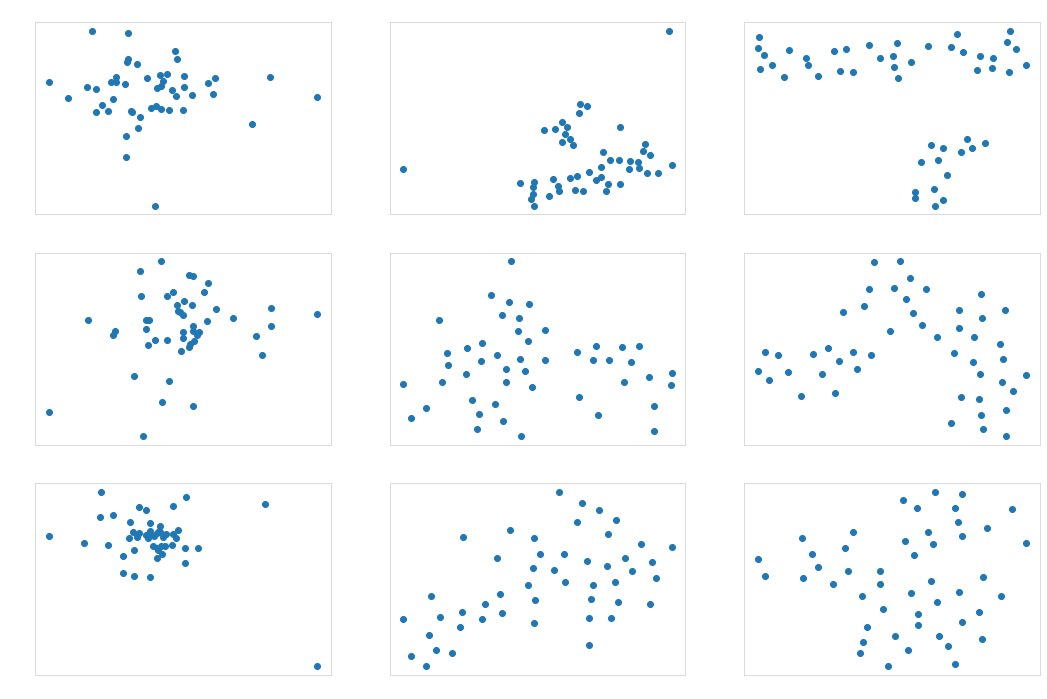

In [34]:
#fig, axs = plt.subplots(3, 3, figsize=(15, 6))
fig, ax = plt.subplots(3, 3, figsize=(18,12))


for i in range(3):
   for j in range(3):
    tsne = TSNE(n_components=2, perplexity = perplexities[i], n_iter = n_iters[j])
    tsne_fit = tsne.fit_transform(songs_df.iloc[:, 1:])
  
    ax[i, j].scatter(tsne_fit[:, 0], 
                    tsne_fit[:, 1])
    
    param_dict = {'perplexity': perplexities[i], 'n_iter': n_iters[j]}
    ax[i, j].set_title("perplexity: " + str(param_dict['perplexity']) + " iterations: " + str(param_dict['n_iter']), color = "white")

In [35]:
# Initialize t-SNE
tsne = TSNE(n_components=2, perplexity = 5,)
tsne_fit = tsne.fit_transform(songs_df.iloc[:, 1:])

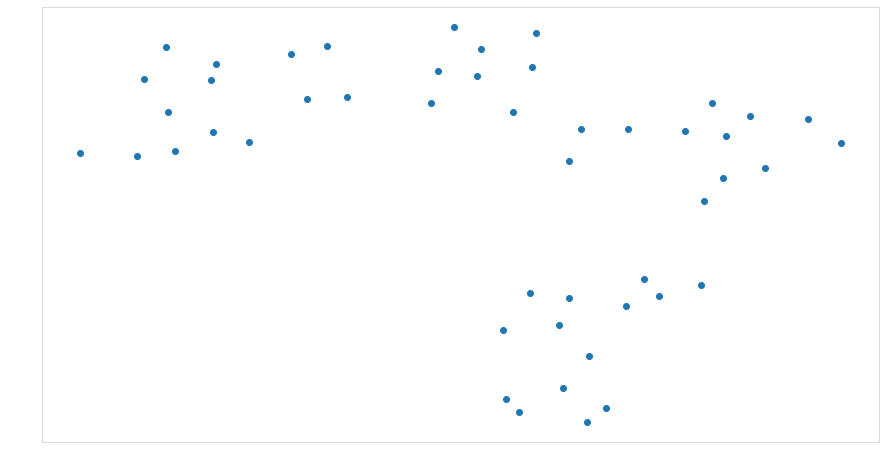

In [36]:
# Plot reduced points
fix, ax = plt.subplots()
#plt.rcParams["figure.figsize"] = (15,8)
ax.scatter(tsne_fit[:, 0], 
            tsne_fit[:, 1])
#plt.xlim(-20, 25)
#plt.ylim(-15, 25)

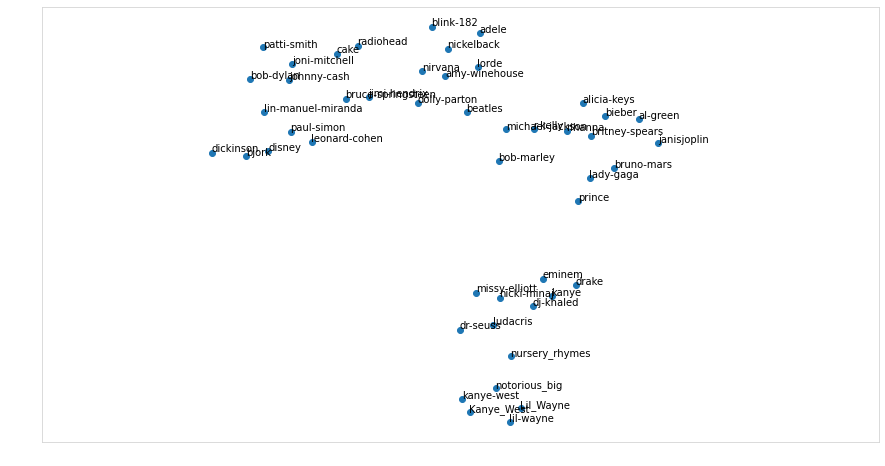

In [37]:
# Plot points with songs names
fix, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (15,8)
ax.scatter(tsne_fit[:, 0], 
            tsne_fit[:, 1])
plt.xlim(-250, 250)
#plt.ylim(-15, 25)

xax = tsne_fit[:, 0]
yax = tsne_fit[:, 1]
for i, txt in enumerate(column_names):

    not_to_move = ['ludacris', 'prince', 'patti-smith', 'michael-jackson', 'amy-winehouse', 'lin-manuel-miranda', 'disney', 'kanye-west']
    if txt not in not_to_move:
        ax.annotate(txt, (xax[i] - 0.3, yax[i] + 0.6))
        
    else:
         ax.annotate(txt, (xax[i], yax[i]))

## Observations
* We succesfully limited the number of dimensions to 2 and could visualize the data. However, we captured only 46% of variance 

* We can clearly see a pattern right there, both with PCA an t-SNE we can observe that artists from similar genres are creating groups
* Dataset might contain songs, which are quite similar to each other in terms of texts, or we can't find two completely different song vectors, because all of writing techniques have something in common
* There were artists in the dataset (Lil Wayne, Kanye West) with more than one song, it turned out that the similarity between songs of the same artist is really big. Does it mean that we can easily define a style of a certain artist?
* We can clearly observe how perplexity and training time changes the t-SNE output, it is important to compare these results whenever we are working with this method
* It would be amazing to analyze how n-grams influence our song vectors and similarities between various artists
* Also, the next step is to compare songs of only one artist and see the results 


Sources:
<br>
Van der Maaten, L., & Hinton, G. (2008). Visualizing data using t-SNE. Journal of machine learning research, 9(11). <br>
https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d <br>
https://youtu.be/MnRskV3NY1k